In [2]:
#Import the required Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Read the data in pandas
from google.colab import drive
drive.mount('/content/drive/')
inp0 = pd.read_csv('../content/drive/MyDrive/BtlHocMay/Attribute DataSet.csv')
inp1 = pd.read_csv("../content/drive/MyDrive/BtlHocMay/Dress Sales.csv")


Mounted at /content/drive/


In [3]:
inp0.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,"4,6",M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0,L,Automn,o-neck,full,natural,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,"4,6",L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,"4,5",M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0


In [4]:
inp1.head()

,Dress_ID,29/8/2013,31/8/2013,2/9/2013,4/9/2013,6/9/2013,8/9/2013,10/9/2013,12/9/2013,14/9/2013,...,24/9/2013,26/9/2013,28/9/2013,30/9/2013,2/10/2013,4/10/2013,6/10/2013,8/10/2010,10/10/2013,12/10/2013
0,1006032852,2114,2274,2491,2660,2727,2887,2930,3119,3204,...,3554,3624.0,3706,3746.0,3795.0,3832.0,3897,3923.0,3985.0,4048
1,1212192089,151,275,570,750,813,1066,1164,1558,1756,...,2710,2942.0,3258,3354.0,3475.0,3654.0,3911,4024.0,4125.0,4277
2,1190380701,6,7,7,7,8,8,9,10,10,...,11,11.0,11,11.0,11.0,11.0,11,11.0,11.0,11
3,966005983,1005,1128,1326,1455,1507,1621,1637,1723,1746,...,1878,1892.0,1914,1924.0,1929.0,1941.0,1952,1955.0,1959.0,1963
4,876339541,996,1175,1304,1396,1432,1559,1570,1638,1655,...,2032,2156.0,2252,2312.0,2387.0,2459.0,2544,2614.0,2693.0,2736


In [5]:
# Print the information about the attributes of inp0 and inp1.
inp0.Price.value_counts()

Average      252
Low          129
low           45
Medium        30
very-high     21
high          15
High           6
Name: Price, dtype: int64

In [6]:
inp0.Season.value_counts()

Summer    159
Spring    122
Winter     99
Automn     61
winter     46
Autumn      8
spring      2
summer      1
Name: Season, dtype: int64

In [7]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Dress_ID        500 non-null    int64 
 1   Style           500 non-null    object
 2   Price           498 non-null    object
 3   Rating          500 non-null    object
 4   Size            500 non-null    object
 5   Season          498 non-null    object
 6   NeckLine        497 non-null    object
 7   SleeveLength    498 non-null    object
 8   waiseline       413 non-null    object
 9   Material        372 non-null    object
 10  FabricType      234 non-null    object
 11  Decoration      264 non-null    object
 12  Pattern Type    391 non-null    object
 13  Recommendation  500 non-null    int64 
dtypes: int64(2), object(12)
memory usage: 54.8+ KB


In [8]:
# Column fixing, correcting size abbreviation. count the percentage of each size category in "Size" column.
inp0.Size = inp0.Size.apply(lambda x: "Medium" if x == 'M' else x)
inp0.Size = inp0.Size.apply(lambda x: "Large" if x == 'L' else x)
inp0.Size = inp0.Size.apply(lambda x: "Extra large" if x == 'XL' else x)
inp0.Size = inp0.Size.apply(lambda x: "Free" if x == 'free' else x)
inp0.Size = inp0.Size.apply(lambda x: "Small" if x == 'S' else x)
inp0.Size = inp0.Size.apply(lambda x: "Small" if x == 'small' else x)

In [9]:
inp0.Size.value_counts(normalize=True)

Medium         0.354
Free           0.346
Large          0.192
Small          0.076
Extra large    0.030
s              0.002
Name: Size, dtype: float64

In [10]:
# Print the value counts of each category in "Size" column.
inp0.Size.value_counts()

Medium         177
Free           173
Large           96
Small           38
Extra large     15
s                1
Name: Size, dtype: int64

In [11]:
# Print the null count of each variables of inp0 and inp1.
inp0.isnull().sum()

Dress_ID            0
Style               0
Price               2
Rating              0
Size                0
Season              2
NeckLine            3
SleeveLength        2
waiseline          87
Material          128
FabricType        266
Decoration        236
Pattern Type      109
Recommendation      0
dtype: int64

In [12]:
inp1.isnull().sum()

Dress_ID        0
29/8/2013       0
31/8/2013       0
2/9/2013        0
4/9/2013        0
6/9/2013        0
8/9/2013        0
10/9/2013       0
12/9/2013       0
14/9/2013       0
16/9/2013       0
18/9/2013       0
20/9/2013       0
22/9/2013       0
24/9/2013       0
26/9/2013     237
28/9/2013       0
30/9/2013     273
2/10/2013     275
4/10/2013     274
6/10/2013       0
8/10/2010     271
10/10/2013    271
12/10/2013      0
dtype: int64

In [13]:
# Print the data types information of inp1 i.e. "Dress Sales" data.
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dress_ID    500 non-null    int64  
 1   29/8/2013   500 non-null    int64  
 2   31/8/2013   500 non-null    int64  
 3   2/9/2013    500 non-null    int64  
 4   4/9/2013    500 non-null    int64  
 5   6/9/2013    500 non-null    int64  
 6   8/9/2013    500 non-null    int64  
 7   10/9/2013   500 non-null    int64  
 8   12/9/2013   500 non-null    object 
 9   14/9/2013   500 non-null    object 
 10  16/9/2013   500 non-null    object 
 11  18/9/2013   500 non-null    object 
 12  20/9/2013   500 non-null    object 
 13  22/9/2013   500 non-null    object 
 14  24/9/2013   500 non-null    int64  
 15  26/9/2013   263 non-null    float64
 16  28/9/2013   500 non-null    int64  
 17  30/9/2013   227 non-null    float64
 18  2/10/2013   225 non-null    float64
 19  4/10/2013   226 non-null    f

In [14]:
# Do the required changes in the "Dress Sales" data set to make it ready for conversion into float type.
inp1.loc[inp1['12/9/2013'] == 'Removed',"12/9/2013"] = np.NaN
inp1.loc[inp1['16/9/2013'] == 'removed',"16/9/2013"] = np.NaN
inp1.loc[inp1['18/9/2013'] == 'removed',"18/9/2013"] = np.NaN
inp1.loc[inp1['20/9/2013'] == 'removed',"20/9/2013"] = np.NaN
inp1.loc[inp1['22/9/2013'] == 'Orders',"20/9/2013"] = np.NaN

In [15]:
# Convert the object type columns in "Dress Sales" into float type of data type.
inp1['12/9/2013'] = inp1['12/9/2013'].apply(pd.to_numeric, downcast='float', errors='coerce')
inp1['14/9/2013'] = inp1['14/9/2013'].apply(pd.to_numeric, downcast='float', errors='coerce')
inp1['16/9/2013'] = inp1['16/9/2013'].apply(pd.to_numeric, downcast='float', errors='coerce')
inp1['18/9/2013'] = inp1['18/9/2013'].apply(pd.to_numeric, downcast='float', errors='coerce')
inp1['20/9/2013'] = inp1['20/9/2013'].apply(pd.to_numeric, downcast='float', errors='coerce')
inp1['22/9/2013'] = inp1['22/9/2013'].apply(pd.to_numeric, downcast='float', errors='coerce')

In [16]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dress_ID    500 non-null    int64  
 1   29/8/2013   500 non-null    int64  
 2   31/8/2013   500 non-null    int64  
 3   2/9/2013    500 non-null    int64  
 4   4/9/2013    500 non-null    int64  
 5   6/9/2013    500 non-null    int64  
 6   8/9/2013    500 non-null    int64  
 7   10/9/2013   500 non-null    int64  
 8   12/9/2013   499 non-null    float64
 9   14/9/2013   499 non-null    float32
 10  16/9/2013   499 non-null    float64
 11  18/9/2013   499 non-null    float64
 12  20/9/2013   498 non-null    float64
 13  22/9/2013   499 non-null    float32
 14  24/9/2013   500 non-null    int64  
 15  26/9/2013   263 non-null    float64
 16  28/9/2013   500 non-null    int64  
 17  30/9/2013   227 non-null    float64
 18  2/10/2013   225 non-null    float64
 19  4/10/2013   226 non-null    f

In [17]:
# Print the null percetange of each column of inp1.
(inp1.isnull().sum()/500)*100

Dress_ID       0.0
29/8/2013      0.0
31/8/2013      0.0
2/9/2013       0.0
4/9/2013       0.0
6/9/2013       0.0
8/9/2013       0.0
10/9/2013      0.0
12/9/2013      0.2
14/9/2013      0.2
16/9/2013      0.2
18/9/2013      0.2
20/9/2013      0.4
22/9/2013      0.2
24/9/2013      0.0
26/9/2013     47.4
28/9/2013      0.0
30/9/2013     54.6
2/10/2013     55.0
4/10/2013     54.8
6/10/2013      0.0
8/10/2010     54.2
10/10/2013    54.2
12/10/2013     0.0
dtype: float64

In [18]:
inp1.shape

(500, 24)

In [19]:
# Drop the columns in "Dress Sales" which have more than 40% of missing values.

inp1.drop(columns = ['26/9/2013','30/9/2013','2/10/2013','4/10/2013','8/10/2010','10/10/2013'], inplace = True)

In [20]:
inp1.shape

(500, 18)

In [21]:
# Create the four seasons columns in inp1, according to the above criteria.
inp1['Summer']= inp1["29/8/2013"].add(inp1["31/8/2013"].add(inp1["6/9/2013"].add(inp1["8/9/2013"].add(inp1["6/10/2013"]))))
inp1['Autumn']= inp1["10/9/2013"].add(inp1["14/9/2013"].add(inp1["16/9/2013"].add(inp1["18/9/2013"].add(inp1["20/9/2013"].add(inp1["22/9/2013"].add(inp1["24/9/2013"].add(inp1["28/9/2013"])))))))
inp1['Winter']= inp1["2/9/2013"].add(inp1["12/9/2013"].add(inp1["12/10/2013"]))
inp1['Spring']= inp1[["4/9/2013"]]

In [22]:
# calculate the sum of sales in each seasons in inp1 i.e. "Dress Sales".
print(inp1['Summer'].sum())
print(inp1['Autumn'].sum())
print(inp1['Winter'].sum())
print(inp1['Spring'].sum())

711176
1406481.0
487533.0
149336


In [23]:
# Merge inp0 with inp1 into inp0. this is also called left merge.
inp0 = pd.merge(left=inp0,right=inp1, how='left', left_on='Dress_ID', right_on='Dress_ID')
inp0.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,...,20/9/2013,22/9/2013,24/9/2013,28/9/2013,6/10/2013,12/10/2013,Summer,Autumn,Winter,Spring
0,1006032852,Sexy,Low,"4,6",Medium,Summer,o-neck,sleevless,empire,NaN,...,3386.0,3479.0,3554,3706,3897,4048,13899,26857.0,9658.0,2660
1,1212192089,Casual,Low,0,Large,Summer,o-neck,Petal,natural,microfiber,...,2106.0,2454.0,2710,3258,3911,4277,6216,17311.0,6405.0,750
2,1190380701,vintage,High,0,Large,Automn,o-neck,full,natural,polyster,...,10.0,11.0,11,11,11,11,40,82.0,28.0,7
3,966005983,Brief,Average,"4,6",Large,Spring,o-neck,full,natural,silk,...,1812.0,1845.0,1878,1914,1952,1963,7213,14411.0,5012.0,1455
4,876339541,cute,Low,"4,5",Medium,Summer,o-neck,butterfly,natural,chiffonfabric,...,1824.0,1919.0,2032,2252,2544,2736,7706,14676.0,5678.0,1396


In [24]:
# Now Drop the Date columns from inp0 as it is already combined into four seasons.
inp0.drop(inp0.loc[:,'29/8/2013':'12/10/2013'].columns, axis= 1, inplace= True)
inp0.isnull().sum()

Dress_ID            0
Style               0
Price               2
Rating              0
Size                0
Season              2
NeckLine            3
SleeveLength        2
waiseline          92
Material          147
FabricType        292
Decoration        266
Pattern Type      119
Recommendation      0
Summer              0
Autumn              2
Winter              1
Spring              0
dtype: int64

In [25]:
inp0[inp0.Autumn.isnull()]

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation,Summer,Autumn,Winter,Spring
124,903426442,sexy,Average,"3,6",Large,Winter,v-neck,full,natural,polyster,woolen,beading,solid,1,4749,NaN,2780.0,942
288,1090993173,party,NaN,"4,5",Large,Summer,NaN,full,NaN,NaN,NaN,NaN,NaN,1,1097,NaN,NaN,62


In [26]:
# Xem Recommendation
inp0['Recommendation'].value_counts()
inp0['Recommendation'] = inp0['Recommendation'] + 1

In [27]:
inp0.Recommendation.value_counts()

1    319
2    231
Name: Recommendation, dtype: int64

In [28]:
# Tạo dữ liệu để train model

y = inp0['Recommendation'].values.reshape(-1,1)

X = inp0.drop(columns=['Recommendation'])

In [29]:
print(X.shape)
print(y.shape)

(550, 17)
(550, 1)


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.1)

In [ ]:
# Xay dung cay
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

my_tree = DecisionTreeClassifier()
my_tree.fit(X_train, y_train)

In [ ]:
# Du doan tren du lieu test
y_pred = my_tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
plot_confusion_matrix(my_tree, X_test, y_test)

In [33]:
# Deal with the missing values of Type-1 columns: Price, Season, NeckLine, SleeveLength, Winter and Autumn.

inp0 = inp0[~inp0.Price.isnull()]

inp0 = inp0[~inp0.Season.isnull()]

inp0 = inp0[~inp0.NeckLine.isnull()]

inp0 = inp0[~inp0.SleeveLength.isnull()]

inp0 = inp0[~inp0.Winter.isnull()]

inp0 = inp0[~inp0.Autumn.isnull()]

In [34]:
# Deal with the missing values for Type-2 columns: Material, FabricType, Decoration and Pattern Type.
inp0.Material= inp0.Material.replace(np.nan, "Missing")

inp0.FabricType= inp0.FabricType.replace(np.nan, "Missing")

inp0.Decoration= inp0.Decoration.replace(np.nan, "Missing")

inp0['Pattern Type']= inp0['Pattern Type'].replace(np.nan, "Missing")

In [35]:
#correcting the spellings.
inp0.Season= inp0.Season.replace('Automn', "Autumn")

inp0.Season= inp0.Season.replace('spring', "Spring")

inp0.Season= inp0.Season.replace('winter', "Winter")

In [36]:
#correcting the Spellings.
inp0.SleeveLength= inp0.SleeveLength.replace(['cap-sleeves', 'capsleeves'], "cap sleeves")

inp0.SleeveLength= inp0.SleeveLength.replace('full', "full sleeves")

inp0.SleeveLength= inp0.SleeveLength.replace(['half','halfsleeve'], "half sleeves")

inp0.SleeveLength= inp0.SleeveLength.replace(['sleevless', 'sleeevless', 'sleeveless', 'sleveless'], "sleeve less")

inp0.SleeveLength= inp0.SleeveLength.replace(['threequarter','threequater', 'thressqatar'], "three quater")

inp0.SleeveLength= inp0.SleeveLength.replace(['turndowncollor','urndowncollor'], "turn down collar")

In [37]:
# Group "Style" categories into "Others" which have less than 50000 sales across all the seasons.
other_group = inp0.groupby(['Style'])[["Summer","Autumn", "Winter","Spring"]].sum()
other_group

,Summer,Autumn,Winter,Spring
Style,,,,
Brief,41501,79297.0,27772.0,8605
Casual,324377,661359.0,220966.0,71363
Flare,451,1161.0,406.0,71
Novelty,5370,14147.0,4738.0,1071
OL,63,158.0,53.0,15
Sexy,137248,277456.0,94955.0,28795
bohemian,17886,41793.0,13105.0,4207
cute,103007,190346.0,67563.0,20943
fashion,91,211.0,74.0,19


In [38]:
other_group["Total"] = other_group["Autumn"].add(other_group["Winter"].add(other_group["Spring"].add(other_group["Summer"])))
other_group

,Summer,Autumn,Winter,Spring,Total
Style,,,,,
Brief,41501,79297.0,27772.0,8605,157175.0
Casual,324377,661359.0,220966.0,71363,1278065.0
Flare,451,1161.0,406.0,71,2089.0
Novelty,5370,14147.0,4738.0,1071,25326.0
OL,63,158.0,53.0,15,289.0
Sexy,137248,277456.0,94955.0,28795,538454.0
bohemian,17886,41793.0,13105.0,4207,76991.0
cute,103007,190346.0,67563.0,20943,381859.0
fashion,91,211.0,74.0,19,395.0


In [39]:
other_group["Total"].sum()

2963140.0

In [40]:
others = other_group[other_group["Total"]<50000]

In [41]:
others

,Summer,Autumn,Winter,Spring,Total
Style,,,,,
Flare,451,1161.0,406.0,71,2089.0
Novelty,5370,14147.0,4738.0,1071,25326.0
OL,63,158.0,53.0,15,289.0
fashion,91,211.0,74.0,19,395.0


In [42]:
inp0.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation,Summer,Autumn,Winter,Spring
0,1006032852,Sexy,Low,"4,6",Medium,Summer,o-neck,sleeve less,empire,Missing,chiffon,ruffles,animal,2,13899,26857.0,9658.0,2660
1,1212192089,Casual,Low,0,Large,Summer,o-neck,Petal,natural,microfiber,Missing,ruffles,animal,1,6216,17311.0,6405.0,750
2,1190380701,vintage,High,0,Large,Autumn,o-neck,full sleeves,natural,polyster,Missing,Missing,print,1,40,82.0,28.0,7
3,966005983,Brief,Average,"4,6",Large,Spring,o-neck,full sleeves,natural,silk,chiffon,embroidary,print,2,7213,14411.0,5012.0,1455
4,876339541,cute,Low,"4,5",Medium,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,1,7706,14676.0,5678.0,1396


In [43]:
# Tạo dữ liệu

X = inp0['Summer'].values.reshape(-1,1)
y= inp0['Spring'].values.reshape(-1,1)

In [44]:
from sklearn.tree import DecisionTreeRegressor

my_tree = DecisionTreeRegressor()
my_tree.fit(X,y)

DecisionTreeRegressor()

In [45]:
X_test = [[4500]]

y_pred = my_tree.predict(X_test)
print(y_pred)

[900.]


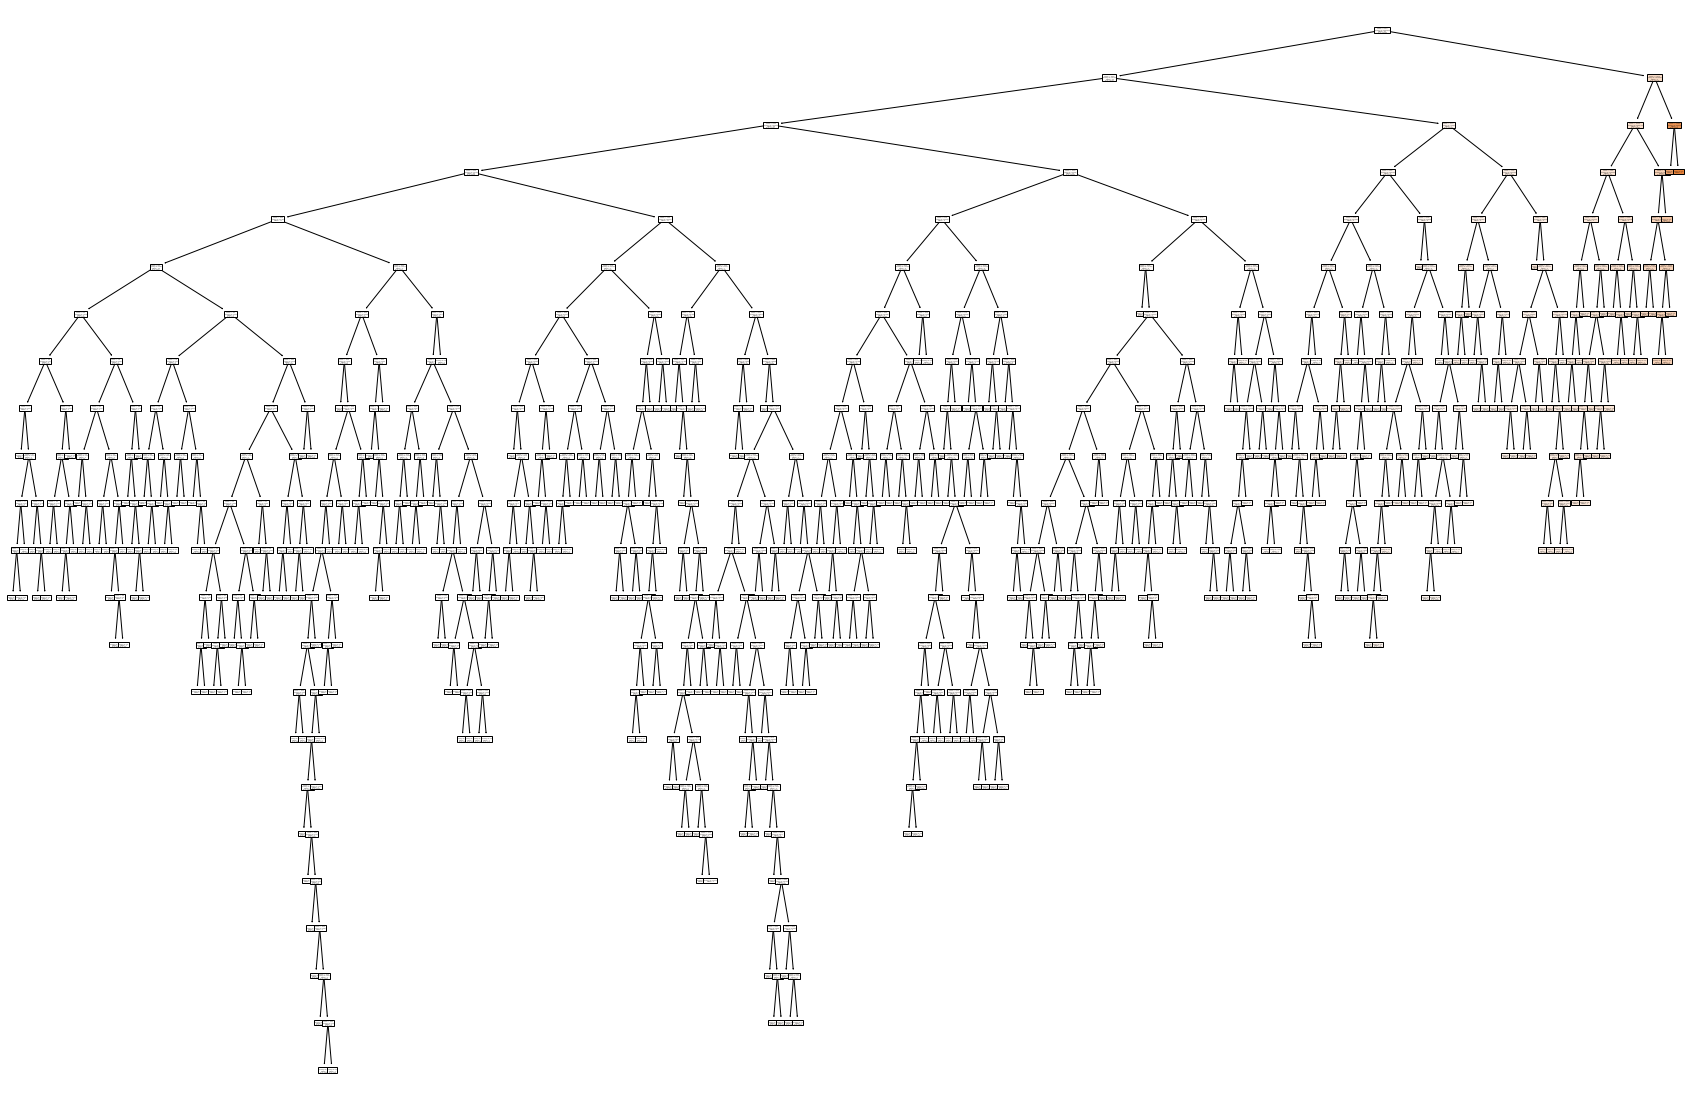

In [46]:
from sklearn import tree
fig = plt.figure(figsize=(30,20))
_ = tree.plot_tree(my_tree, feature_names=['Summer'], class_names=['Spring'], filled=True)

In [47]:
others["Total"].sum()

28099.0

In [48]:
# Calculate the percentage of each categories in the "Style" variable.
cute_sum = 44/479 * 100
print(cute_sum)
others_sum = 10/479 *100
print(others_sum)

9.18580375782881
2.0876826722338206


Casual      0.466790
Sexy        0.145756
party       0.092251
cute        0.088561
vintage     0.047970
bohemian    0.047970
Brief       0.036900
work        0.033210
Novelty     0.022140
sexy        0.011070
Flare       0.003690
OL          0.001845
fashion     0.001845
Name: Style, dtype: float64


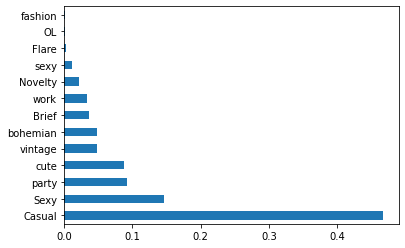

In [49]:
print(inp0.Style.value_counts(normalize=True))
inp0.Style.value_counts(normalize=True).plot.barh()
plt.show()

In [50]:
# Describe the numerical variale: "Autumn".
inp0.Autumn.describe()

count      542.000000
mean      2808.418819
std       4779.968323
min          1.000000
25%        485.500000
50%       1428.000000
75%       2990.000000
max      55532.000000
Name: Autumn, dtype: float64

In [51]:
55532.000000 - 2990.000000

52542.0

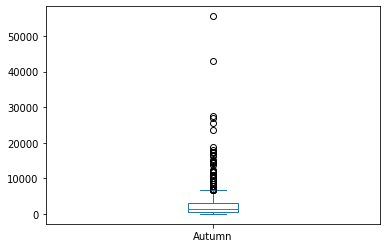

In [52]:
# plot the boxplot of "Autumn" column.
inp0.Autumn.plot.box()

In [53]:
# Find the maximum and 99th percentile of Winter season.
inp0.Winter.quantile([0.99,1.0])

0.99     8008.61
1.00    20388.00
Name: Winter, dtype: float64

In [54]:
20388.0 - 8008.61

12379.39

In [55]:
# Find the maximum and 99th percentile of Summer season.
inp0.Summer.quantile([0.99,1.0])

0.99    12883.02
1.00    35577.00
Name: Summer, dtype: float64

In [56]:
35577.0 - 12883.02

22693.98

In [57]:
# Find the maximum and 99th percentile of Spring season.
inp0.Spring.quantile([0.99,1.0])

0.99    2541.61
1.00    7374.00
Name: Spring, dtype: float64

In [58]:
7374.0 - 2541.61

4832.389999999999

In [59]:
# Find the maximum and 99th percentile of Autumn season.
inp0.Autumn.quantile([0.99,1.0])

0.99    21545.34
1.00    55532.00
Name: Autumn, dtype: float64

In [60]:
55532.0 - 21545.34

33986.66

In [ ]:
# Find the Mean of Ratings for each Price category.
inp0.groupby("Price")['Rating'].mean()
# Find the median of Ratings for each Style category.
inp0.groupby("Style")['Rating'].median()
lỗi

In [61]:
# Summer sale vs Recommendation.
inp0[inp0.Recommendation == 1].Summer.mean()

1370.4069400630915

In [62]:
# Spring sale vs Recommendation.
inp0[inp0.Recommendation == 1].Spring.mean()

289.9589905362776

In [63]:
# Autumn sale vs Recommendation.
inp0[inp0.Recommendation == 1].Autumn.mean()

2759.6940063091483

In [64]:
# Winter sale vs Recommendation.
inp0[inp0.Recommendation == 1].Winter.mean()

946.6813880126183

In [65]:
# Size vs Recommendation.
inp0.groupby(['Size'])['Recommendation'].mean()

Size
Extra large    1.375000
Free           1.439791
Large          1.366337
Medium         1.434555
Small          1.357143
s              1.000000
Name: Recommendation, dtype: float64

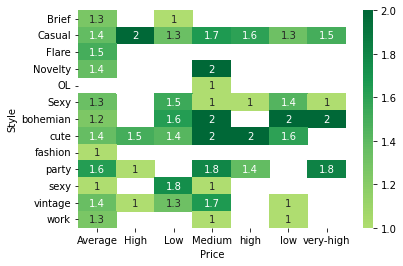

In [66]:
# plot the heat map of Style, price and Recommendation.
res = pd.pivot_table(data=inp0, index="Style", columns="Price", values="Recommendation")
sns.heatmap(res, cmap="RdYlGn", annot=True, center=0.427)
plt.show()

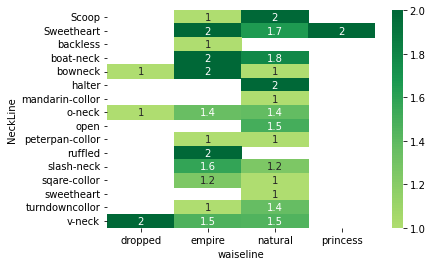

In [67]:
# plot the heat map of Style, price and Recommendation.
res = pd.pivot_table(data=inp0, index="NeckLine", columns="waiseline", values="Recommendation")
sns.heatmap(res, cmap="RdYlGn", annot=True, center=0.427)
plt.show()

In [68]:
inp0.Recommendation.mean()

1.415129151291513

In [69]:
inp0[inp0.Price == "Average"].Recommendation.mean()

1.3682310469314078

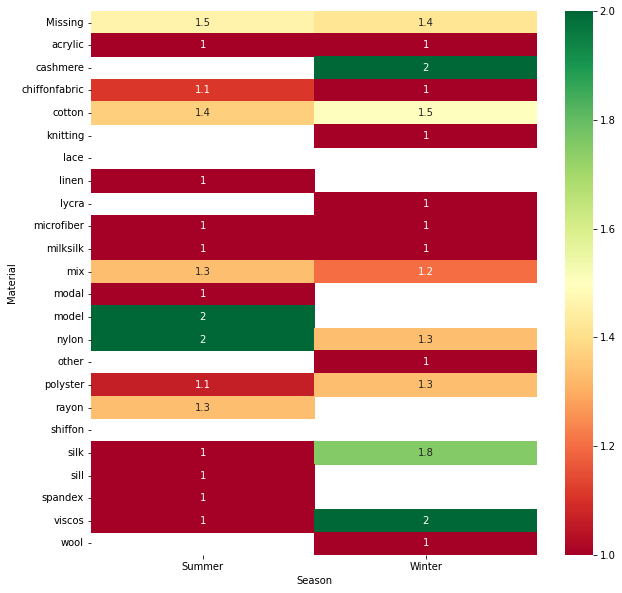

In [71]:
# plot the heat map of Season, material and Recommendation.
res = pd.pivot_table(data=inp0, index='Material', columns='Season', values='Recommendation')
plt.figure(figsize=[10,10])
sns.heatmap(res[['Summer','Winter']], cmap='RdYlGn', annot=True)

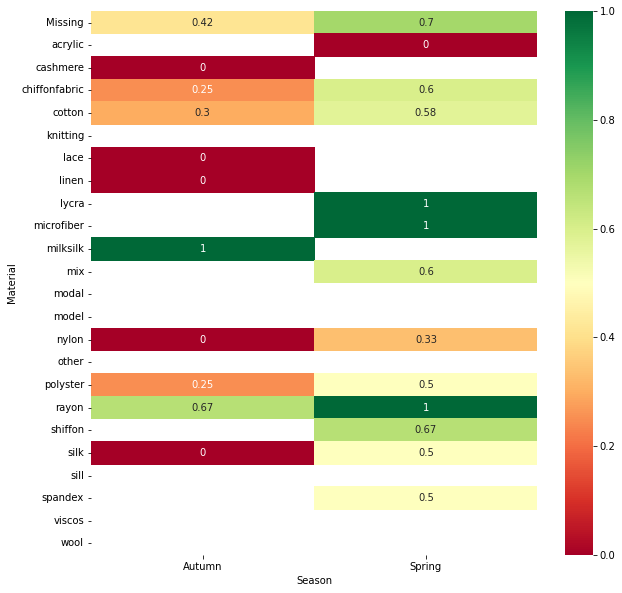

In [ ]:
# plot the heat map of Season, material and Recommendation.
res = pd.pivot_table(data=inp0, index='Material', columns='Season', values='Recommendation')
plt.figure(figsize=[10,10])
sns.heatmap(res[['Autumn','Spring']], cmap='RdYlGn', annot=True)

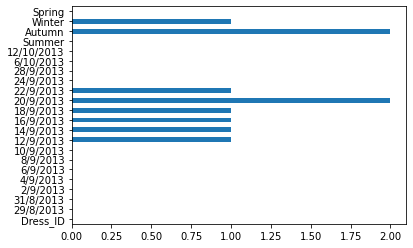

In [72]:
inp1.isnull().sum().plot(kind = 'barh')

In [73]:
# Group "Style" categories into "Others" which have less than 50000 sales across all the seasons.
inp0['total'] = inp0['Summer'] + inp0['Autumn'] + inp0['Winter'] + inp0['Spring']
style_group = inp0['total'].groupby(inp0['Style']).sum().reset_index()
res = style_group.loc[style_group['total']<50000]
res

,Style,total
2,Flare,2089.0
3,Novelty,25326.0
4,OL,289.0
8,fashion,395.0


In [74]:
# Group "Neckline" categories into "Others" which have less than 50000 sales across all the seasons.
neck_group = inp0['total'].groupby(inp0['NeckLine']).sum().reset_index()
res = neck_group.loc[neck_group['total']<50000]
res

,NeckLine,total
0,Scoop,3135.0
1,Sweetheart,14588.0
2,backless,2888.0
4,bowneck,21633.0
5,halter,2355.0
6,mandarin-collor,289.0
8,open,7396.0
9,peterpan-collor,20151.0
12,sqare-collor,32395.0
13,sweetheart,2728.0


In [75]:
# Group "Sleeve length" categories into "Others" which have less than 50000 sales across all the seasons.
sleeve_group = inp0['total'].groupby(inp0['SleeveLength']).sum().reset_index()
res = sleeve_group.loc[sleeve_group['total']<50000]
res

,SleeveLength,total
0,Petal,30682.0
1,butterfly,29456.0
2,cap sleeves,18300.0
8,turn down collar,3583.0


In [76]:
# Group "material" categories into "Others" which have less than 25000 sales across all the seasons.
mat_group = inp0['total'].groupby(inp0['Material']).sum().reset_index()
res = mat_group.loc[mat_group['total']<25000]
res

,Material,total
1,acrylic,12155.0
2,cashmere,5667.0
5,knitting,6897.0
6,lace,6296.0
7,linen,20149.0
8,lycra,12555.0
12,modal,522.0
13,model,245.0
15,other,5458.0
18,shiffon,11166.0


In [77]:
# Group "fabric type" categories into "Others" which have less than 25000 sales across all the seasons.
fab_group = inp0['total'].groupby(inp0['FabricType']).sum().reset_index()
res = fab_group.loc[fab_group['total']<25000]
res

,FabricType,total
0,Corduroy,10866.0
2,batik,4021.0
5,dobby,10296.0
6,flannael,6835.0
7,flannel,14733.0
9,knitted,14.0
10,knitting,39.0
11,lace,2082.0
12,organza,762.0
13,other,1251.0


In [78]:
res['FabricType']

0     Corduroy
2        batik
5        dobby
6     flannael
7      flannel
9      knitted
10    knitting
11        lace
12     organza
13       other
14      poplin
15       satin
16      sattin
18       terry
19       tulle
20      wollen
Name: FabricType, dtype: object

In [79]:
# Group "patern type" categories into "Others" which have less than 25000 sales across all the seasons.
pat_group = inp0['total'].groupby(inp0['Pattern Type']).sum().reset_index()
res = pat_group.loc[pat_group['total']<25000]
res

,Pattern Type,total
2,character,3738.0
4,floral,10614.0
6,leapord,3017.0
8,none,5991.0
10,plaid,1369.0
13,splice,10923.0


In [80]:
# Group "decoration" categories into "Others" which have less than 25000 sales across all the seasons.
dec_group = inp0['total'].groupby(inp0['Decoration']).sum().reset_index()
res = dec_group.loc[dec_group['total']<25000]
res

,Decoration,total
1,Tiered,22147.0
6,cascading,210.0
7,crystal,6450.0
8,draped,7099.0
10,feathers,64.0
11,flowers,6676.0
14,none,7743.0
15,pearls,41.0
16,plain,2740.0
17,pockets,21532.0


In [81]:
x = inp0['Autumn'].max() - inp0['Autumn'].quantile(0.75)
x

52542.0

In [82]:
# Describe the numerical variale: "Autumn".
inp0['Autumn'].describe()

count      542.000000
mean      2808.418819
std       4779.968323
min          1.000000
25%        485.500000
50%       1428.000000
75%       2990.000000
max      55532.000000
Name: Autumn, dtype: float64

In [83]:
inp0['Recommendation'].groupby(inp0['Season']).mean()

Season
Autumn    1.316456
Spring    1.615942
Summer    1.333333
Winter    1.381579
summer    1.000000
Name: Recommendation, dtype: float64